## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouseStudy = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
mouseStudy.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

regimenGroup = mouseStudy.groupby(["Drug Regimen"])

avgTumor = regimenGroup["Tumor Volume (mm3)"].mean()
medianTumor = regimenGroup["Tumor Volume (mm3)"].median()
varTumor = regimenGroup["Tumor Volume (mm3)"].var()
stdTumor = regimenGroup["Tumor Volume (mm3)"].std()
semTumor = regimenGroup["Tumor Volume (mm3)"].sem()


mouseSummaryTable = pd.DataFrame({"Average Tumor Size": avgTumor,
                            "Median Tumor Size": medianTumor, "Variance": varTumor,
                           "Standard Deviation": stdTumor, "SEM": semTumor})
mouseSummaryTable

,Average Tumor Size,Median Tumor Size,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

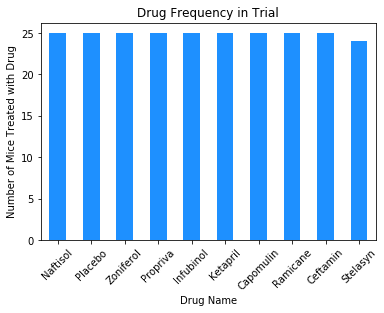

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
uniqueByMouse = mouseStudy.sort_values(by="Drug Regimen").drop_duplicates(subset="Mouse ID")
barGraphGroups = uniqueByMouse.groupby(["Drug Regimen"])
pd.value_counts(uniqueByMouse["Drug Regimen"]).plot(kind="bar", color="dodgerblue")
plt.xticks(rotation=45)
plt.xlabel("Drug Name")
plt.ylabel("Number of Mice Treated with Drug")
plt.title("Drug Frequency in Trial")
plt.show()

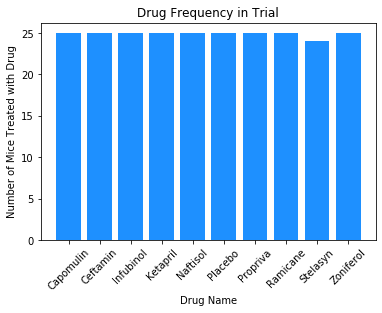

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
uniqueByMouse = mouseStudy.sort_values(by="Drug Regimen").drop_duplicates(subset="Mouse ID")
barGraphGroups = uniqueByMouse.groupby(["Drug Regimen"])

x_axis = np.arange(len(barGraphGroups["Drug Regimen"]))
y_axis = barGraphGroups["Mouse ID"].count()

plt.bar(x_axis, y_axis, color = "dodgerblue")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol",
                            "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation = 45)

plt.xlabel("Drug Name")
plt.ylabel("Number of Mice Treated with Drug")
plt.title("Drug Frequency in Trial")
plt.show()

## Pie plots

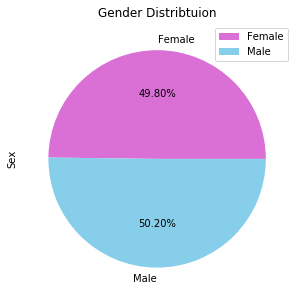

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
uniqueByMouseGender = mouseStudy.sort_values(by="Sex").drop_duplicates(subset="Mouse ID")
pieGraphGroup = uniqueByMouseGender.groupby(["Sex"])
counts = pieGraphGroup["Sex"].count()
pieGraphData = pd.DataFrame(counts)
piePlot = pieGraphData.plot.pie(subplots=True, figsize = (5,5), colors = ["orchid", "skyblue"], autopct = "%.2f%%")
plt.title("Gender Distribtuion")
plt.show()


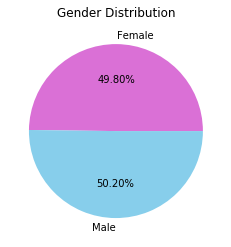

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
uniqueByMouseGender = mouseStudy.sort_values(by="Sex").drop_duplicates(subset="Mouse ID")
pieGraphGroup = uniqueByMouseGender.groupby(["Sex"])

labels = ["Female", "Male"]
sizes = pieGraphGroup["Sex"].count()
plt.pie(sizes, labels=labels, colors = ["orchid", 'skyblue'], autopct = "%.2f%%")
plt.title("Gender Distribution")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# uniqueMouse = mouseStudy.groupby(["Mouse ID", "Drug Regimen"])["Timepoint",  "Tumor Volume (mm3)"].max()

# i = 0
# length = len(uniqueMouse)

# ramicaneFinalTumorVol = []
# capomulinFinalTumorVol = []
# infubinolFinalTumorVol =[]
# ceftaminFinalTumorVol = []

# for i in range(length):
#     if uniqueMouse.index[i][1] == "Ramicane":
#         ramicaneFinalTumorVol.append(uniqueMouse.iloc[i,1])
        
#     elif uniqueMouse.index[i][1] == "Capomulin":
#         capomulinFinalTumorVol.append(uniqueMouse.iloc[i,1])
        
#     elif uniqueMouse.index[i][1] == "Infubinol":
#         infubinolFinalTumorVol.append(uniqueMouse.iloc[i,1])
        
#     elif uniqueMouse.index[i][1] == "Ceftamin":
#         ceftaminFinalTumorVol.append(uniqueMouse.iloc[i,1])
           
# ramicaneFinalTumorVolDf = pd.DataFrame(ramicaneFinalTumorVol)
# capomulinFinalTumorVolDf = pd.DataFrame(capomulinFinalTumorVol)
# infubinolFinalTumorVolDf = pd.DataFrame(infubinolFinalTumorVol)
# ceftaminFinalTumorVolDf = pd.DataFrame(ceftaminFinalTumorVol)

# ramQuartiles = ramicaneFinalTumorVolDf.quantile([0.25,0.5,0.75])
# ramQuartiles = ramQuartiles[0]
# ramLowQ = ramQuartiles[0.25]
# ramUpQ = ramQuartiles[0.75]
# ramIQR = ramUpQ-ramLowQ
# ramLower = ramLowQ - (1.5 * ramIQR)
# ramUpper = ramUpQ + (1.5 * ramIQR)
# # print(f"Values below {ramLower} could be outliers for Ramicane.")
# # print(f"Values above {ramUpper} could be outliers for Ramicane.")

# capQuartiles = capomulinFinalTumorVolDf.quantile([0.25, 0.5, 0.75])
# capQuartiles = capQuartiles[0]
# capLowQ = capQuartiles[0.25]
# capUpQ = capQuartiles[0.75]
# capIQR = capUpQ-capLowQ
# capLower = capLowQ - (1.5 * capIQR)
# capUpper = capUpQ + (1.5 * capIQR)
# # print(f"Values below {capLower} could be outliers for Capomulin.")
# # print(f"Values above {capUpper} could be outliers for Capomulin.")

# infQuartiles = infubinolFinalTumorVolDf.quantile([0.25, 0.5, 0.75])
# infQuartiles = infQuartiles[0]
# infLowQ = infQuartiles[0.25]
# infUpQ = infQuartiles[0.75]
# infIQR = infUpQ - infLowQ
# infLower = infLowQ - (1.5 * infIQR)
# infUpper = infUpQ + (1.5 * infIQR)
# # print(f"Values below {infLower} could be outliers for Infubinol.")
# # print(f"Values above {infUpper} could be outliers for Infubinol.")

# cefQuartiles = ceftaminFinalTumorVolDf.quantile([0.25, 0.5, 0.75])
# cefQuartiles = cefQuartiles[0]
# cefLowQ = cefQuartiles[0.25]
# cefUpQ = cefQuartiles[0.75]
# cefIQR = cefUpQ - cefLowQ
# cefLower = cefLowQ - (1.5 * cefIQR)
# cefUpper = cefUpQ + (1.5 * cefIQR)
# # print(f"Values below {cefLower} could be outliers for Ceftamin.")
# # print(f"Values above {cefUpper} could be outliers for Ceftamin.")     


In [8]:
fourTreatments = mouseStudy.loc[((mouseStudy["Drug Regimen"]=="Ramicane") |
                                        (mouseStudy["Drug Regimen"]=="Capomulin") |
                                         (mouseStudy["Drug Regimen"]=="Infubinol") |
                                        (mouseStudy["Drug Regimen"]=="Ceftamin"))]

treatmentsGrouped = fourTreatments.groupby(["Mouse ID", "Drug Regimen"])["Timepoint", "Tumor Volume (mm3)"].max()

treatmentsGroupedDf = pd.DataFrame(treatmentsGrouped)


fourTreatmentsFinal = pd.merge(fourTreatments, treatmentsGroupedDf, how ="inner", on =["Mouse ID", "Drug Regimen", 
                                                                                       "Timepoint"])

fourTreatmentsFinal = fourTreatmentsFinal.rename(columns ={"Tumor Volume (mm3)_y": "Final Tumor Volume (mm3)"})

ramicaneFinalTumorVol = fourTreatmentsFinal.loc[fourTreatmentsFinal["Drug Regimen"]=="Ramicane", 
                                                ["Final Tumor Volume (mm3)"]]
capomulinFinalTumorVol = fourTreatmentsFinal.loc[fourTreatmentsFinal["Drug Regimen"]=="Capomulin", 
                                                 ["Final Tumor Volume (mm3)"]]
infubinolFinalTumorVol = fourTreatmentsFinal.loc[fourTreatmentsFinal["Drug Regimen"]=="Infubinol", 
                                                 ["Final Tumor Volume (mm3)"]]
ceftaminFinalTumorVol = fourTreatmentsFinal.loc[fourTreatmentsFinal["Drug Regimen"]=="Ceftamin", 
                                                ["Final Tumor Volume (mm3)"]]
fourTreatmentsFinal

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)_x,Metastatic Sites,Final Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,45,22.050126,1,45.000000
1,s185,Capomulin,Female,3,17,45,23.343598,1,45.000000
2,x401,Capomulin,Female,16,15,45,28.484033,0,45.473753
3,m601,Capomulin,Male,22,17,45,28.430964,1,45.000000
4,g791,Ramicane,Male,11,16,45,29.128472,1,45.851531
...,...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3,61.386660
96,y163,Infubinol,Female,17,27,45,67.685569,3,67.685569
97,y769,Ceftamin,Female,6,27,45,68.594745,4,68.594745
98,y865,Ceftamin,Male,23,26,45,64.729837,3,64.729837


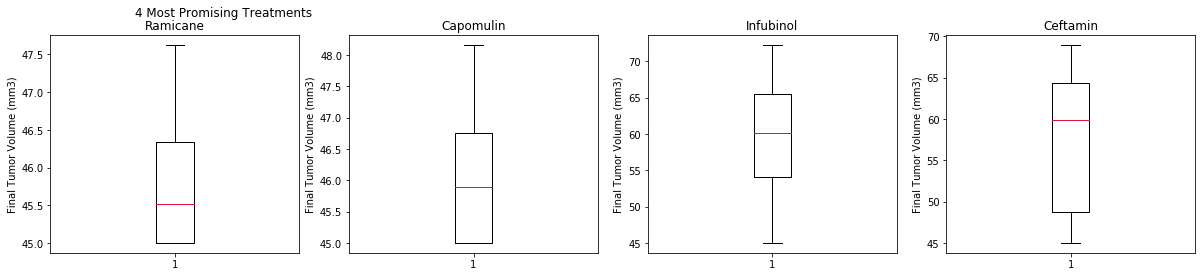

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axs = plt.subplots(1,4)
fig.suptitle("4 Most Promising Treatments")

flierprops = dict(marker='o', markerfacecolor='lightseagreen', markersize=7, linestyle='none')
medianprops= dict(color="crimson")

axs[0].boxplot(ramicaneFinalTumorVol["Final Tumor Volume (mm3)"], flierprops=flierprops, medianprops=medianprops)
axs[0].set_title("Ramicane")
axs[0].set_ylabel("Final Tumor Volume (mm3)")
axs[1].boxplot(capomulinFinalTumorVol["Final Tumor Volume (mm3)"], flierprops=flierprops, medianprops=medianprops)
axs[1].set_title("Capomulin")
axs[1].set_ylabel("Final Tumor Volume (mm3)")
axs[2].boxplot(infubinolFinalTumorVol["Final Tumor Volume (mm3)"], flierprops=flierprops, medianprops=medianprops)
axs[2].set_title("Infubinol")
axs[2].set_ylabel("Final Tumor Volume (mm3)")
axs[3].boxplot(ceftaminFinalTumorVol["Final Tumor Volume (mm3)"], flierprops=flierprops, medianprops=medianprops)
axs[3].set_title("Ceftamin")
axs[3].set_ylabel("Final Tumor Volume (mm3)")


plt.subplots_adjust(left = 0.1, bottom = None, right = 2.75, top = None, wspace = 0.2, hspace = 0.2)
plt.show()

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

s185 = mouseStudy.loc[mouseStudy["Mouse ID"]== "s185"]
xvalues= s185["Timepoint"]
yvalues = s185["Tumor Volume (mm3)"]
plt.plot(xvalues, yvalues, color = "darkolivegreen")
plt.title("Tumor Volume over Time for Mouse S185")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time")
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulinMice = mouseStudy.loc[mouseStudy["Drug Regimen"]=="Capomulin"]
capomulinMiceGroups = capomulinMice.groupby(["Mouse ID"])
mouseWeight = capomulinMiceGroups["Weight (g)"].mean()
mouseTumorVol = capomulinMiceGroups["Tumor Volume (mm3)"].mean()

plt.title("Average Mouse weight and Average Tumor Volume for mice treated with Capomulin")
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(mouseWeight,mouseTumorVol, color = "midnightblue")
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen
slope, intercept, rvalue, pvalue, stderr = st.linregress(mouseWeight, mouseTumorVol)
regressValues = mouseWeight* slope + intercept
lineEq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.scatter(mouseWeight, mouseTumorVol, color = "midnightblue")
plt.plot(mouseWeight, regressValues, color ="firebrick")
plt.annotate(lineEq, (20, 36), fontsize = 15, color = "firebrick")
plt.title("Average Mouse Weight versus Average Tumor Volume for Mice Treated with Capomulin")
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
